In [1]:
from lib import vups

In [2]:
import pandas as pd

,DataNotificacao,DataCadastro,DataDiagnostico,DataColeta_RT_PCR,DataColetaTesteRapido,DataColetaSorologia,DataColetaSorologiaIGG,DataEncerramento,DataObito,Classificacao,...,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,ResultadoRT_PCR,ResultadoTesteRapido,ResultadoSorologia,ResultadoSorologia_IGG,TipoTesteRapido,UF,UF_MUN
0,2021-07-05,2021-06-30,2021-06-30,2021-06-30,NaN,NaN,NaN,NaN,NaN,Suspeito,...,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado,ES,"CONCEICAO DA BARRA, ES"
1,2021-07-05,2021-06-30,2021-06-30,2021-07-05,NaN,NaN,NaN,NaN,NaN,Suspeito,...,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado,ES,"CONCEICAO DA BARRA, ES"
2,2021-07-05,2021-05-20,2021-07-03,2021-05-17,2021-07-05,NaN,NaN,NaN,NaN,Suspeito,...,Não,Não,Não,Negativo,Negativo,Não Informado,Não Informado,Teste rápido Antígeno,ES,"PIUMA, ES"
3,2021-07-05,2020-11-16,2021-07-02,NaN,2021-07-05,NaN,NaN,NaN,NaN,Suspeito,...,Não,Não,Não,Não Informado,Negativo,Não Informado,Não Informado,Teste rápido Antígeno,ES,"SERRA, ES"
4,2021-07-05,2021-05-24,2021-07-02,NaN,2021-07-05,NaN,NaN,2021-07-05,NaN,Descartados,...,Não,Não,Não,Não Informado,Negativo,Não Informado,Não Informado,Teste rápido Antígeno,ES,"SAO ROQUE DO CANAA, ES"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651532,2020-02-27,2020-04-16,2020-02-15,2020-02-27,NaN,NaN,NaN,2020-04-16,NaN,Descartados,...,Não,Não Informado,Não Informado,Negativo,Não Informado,Não Informado,Não Informado,Não Informado,ES,"VILA VELHA, ES"
1651533,2020-02-27,2020-04-16,2020-02-15,2020-02-27,NaN,NaN,NaN,2020-04-16,NaN,Descartados,...,Não,Não Informado,Não Informado,Negativo,Não Informado,Não Informado,Não Informado,Não Informado,ES,"VILA VELHA, ES"
1651534,2020-02-27,2020-04-15,2020-02-25,2020-02-26,NaN,NaN,NaN,2020-04-15,NaN,Descartados,...,Não,Não Informado,Não Informado,Negativo,Não Informado,Não Informado,Não Informado,Não Informado,ES,"ARACRUZ, ES"
1651535,2020-02-25,2020-04-16,2020-02-13,2020-02-26,NaN,NaN,NaN,2020-04-16,2020-04-16,Descartados,...,Não,Não,Não,Negativo,Não Informado,Não Informado,Não Informado,Não Informado,ES,"SERRA, ES"


# Obtendo os Dados

In [ ]:
df = vups.datasets.microdados()
df['UF'] = 'ES'
df['UF_MUN'] = df[['Municipio', 'UF']].agg(', '.join, axis=1)
df

# Exploratory Data Analysis

## Classificando as Variáveis

In [7]:
df.columns

Index(['DataNotificacao', 'DataCadastro', 'DataDiagnostico',
       'DataColeta_RT_PCR', 'DataColetaTesteRapido', 'DataColetaSorologia',
       'DataColetaSorologiaIGG', 'DataEncerramento', 'DataObito',
       'Classificacao', 'Evolucao', 'CriterioConfirmacao', 'StatusNotificacao',
       'Municipio', 'Bairro', 'FaixaEtaria', 'IdadeNaDataNotificacao', 'Sexo',
       'RacaCor', 'Escolaridade', 'Gestante', 'Febre',
       'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia',
       'Cefaleia', 'ComorbidadePulmao', 'ComorbidadeCardio',
       'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo',
       'ComorbidadeObesidade', 'FicouInternado', 'ViagemBrasil',
       'ViagemInternacional', 'ProfissionalSaude', 'PossuiDeficiencia',
       'MoradorDeRua', 'ResultadoRT_PCR', 'ResultadoTesteRapido',
       'ResultadoSorologia', 'ResultadoSorologia_IGG', 'TipoTesteRapido', 'UF',
       'UF_MUN'],
      dtype='object')

- ## Variáveis de Datas
'DataNotificacao', 'DataCadastro', 'DataDiagnostico', 'DataColeta_RT_PCR', 'DataColetaTesteRapido', 'DataColetaSorologia', 'DataColetaSorologiaIGG', 'DataEncerramento', 'DataObito'

- ## Variáveis de Localização
'Municipio', 'Bairro', 'MoradorDeRua'

- ## Rastreio da Exposição
'ViagemBrasil', 'ViagemInternacional', 'ProfissionalSaude'

- ## Dados Pessoais
'IdadeNaDataNotificacao', 'Sexo', 'RacaCor', 'Escolaridade'

- ## Condição
'Gestante', 'FaixaEtaria'

- ## Sintomas
'Febre', 'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia', 'Cefaleia'

- ## Comorbidades
'ComorbidadePulmao', 'ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo', 'ComorbidadeObesidade'

- ## Outras limitações 
'PossuiDeficiencia'

- ## Resultados de Exames
'ResultadoRT_PCR', 'ResultadoTesteRapido', 'ResultadoSorologia', 'ResultadoSorologia_IGG', 'TipoTesteRapido'

- ## Tratamento
'FicouInternado'

- ## Acompanhamento
'Classificacao', 'Evolucao', 'CriterioConfirmacao', 'StatusNotificacao'

## Descriptive Statistical

## Analisando dados de localização
Objetivo: plotar em um gráfico a origem dos casos

In [8]:
df[['UF', 'Municipio', 'Bairro', 'MoradorDeRua']].head()

,UF,Municipio,Bairro,MoradorDeRua
0,ES,CONCEICAO DA BARRA,ITAÚNAS,Não
1,ES,CONCEICAO DA BARRA,SANTO AMARO,Não
2,ES,PIUMA,CENTRO,Não
3,ES,SERRA,NOVO PORTO CANOA,Não
4,ES,SAO ROQUE DO CANAA,CENTRO,Não


In [ ]:
# Função para agrupamento
def group_by(df, col):

    # Agregação
    grouped = df.groupby(by = col, as_index = False).agg({'Venda':'sum',
                                                          'Lucro':'sum',
                                                          'Quantidade':'sum',
                                                          'Desconto':'mean'})

    # Calculando a margem de lucro
    grouped['Margem_Lucro'] = np.multiply(np.divide(grouped['Lucro'], grouped['Venda']), 100).round(2)
    
    return grouped

Como não há dados de coordenadas geográficas, precisamos obtê-los.

In [9]:
# Primeiro vamos obter uma lista ordenada de cidades únicas
# LISTA_MUNICIPIOS = sorted(set(list(df.Municipio.unique())))
# LISTA_MUNICIPIOS
DF_LOCATION = pd.DataFrame(set(list(df.UF_MUN.unique())), columns=['municipio'])


In [10]:
DF_LOCATION.dropna

<bound method DataFrame.dropna of                      municipio
0               RIO GRANDE, ES
1              VIRGOLANDIA, ES
2                 PITANGUI, ES
3     BRASILIA - ASA NORTE, ES
4           BELO HORIZONTE, ES
...                        ...
1267               CAMACAN, ES
1268         MIGUEL CALMON, ES
1269        AGUAS FORMOSAS, ES
1270              ALTAMIRA, ES
1271                ABAIRA, ES

[1272 rows x 1 columns]>

## GeoPy

In [11]:
!pip install geopy

In [ ]:
# !pip install geopy
# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="myGeocoder")
# location = geolocator.geocode("VILA VALERIO")
# print(location.address)
# print((location.latitude, location.longitude))
# print(location.raw)

In [12]:
from geopy.geocoders import Nominatim

In [13]:
geolocator = Nominatim(user_agent="myGeocoder")

In [14]:
from geopy.extra.rate_limiter import RateLimiter

In [15]:
from tqdm import tqdm
tqdm.pandas()

In [16]:
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [ ]:
DF_LOCATION['municipio']

In [17]:
DF_LOCATION['location'] = DF_LOCATION['municipio'].progress_apply(geocode)

 26%|██▋       | 337/1272 [05:52<17:13,  1.10s/it]RateLimiter caught an error, retrying (0/2 tries). Called with (*('SANTO ANTONIO DO MONTE, ES',), **{}).
Traceback (most recent call last):
  File "C:\Users\ulp\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 445, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\ulp\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 440, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\ulp\anaconda3\lib\http\client.py", line 1347, in getresponse
    response.begin()
  File "C:\Users\ulp\anaconda3\lib\http\client.py", line 307, in begin
    version, status, reason = self._read_status()
  File "C:\Users\ulp\anaconda3\lib\http\client.py", line 268, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\ulp\anaconda3\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\ulp\anacond

In [ ]:
#DF_LOCATION.to_parquet("DF_LOCATION.parquet", engine="pyarrow")
#DF_LOCATION.to_parquet("DF_LOCATION.parquet", engine="fastparquet")
#DF_LOCATION.to_hdf("DF_LOCATION.h5", "DF_LOCATION", format="table", mode="w")

In [18]:
DF_LOCATION['point'] = DF_LOCATION['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [19]:
DF_LOCATION.to_csv('DF_LOCATION.csv')

In [20]:
pd.reset_option('float_format')

In [21]:
DF_LOCATION['latitude'] = DF_LOCATION['location'].apply(lambda loc: loc.latitude if loc else None)

In [22]:
DF_LOCATION['longitude'] = DF_LOCATION['location'].apply(lambda loc: loc.longitude if loc else None)

In [39]:
DF_LOCATION.drop(['latitiude'], axis=1, inplace=True)

In [24]:
DF_LOCATION.drop(['location'], axis=1, inplace=True)

In [25]:
DF_LOCATION.drop(['point'], axis=1, inplace=True)

In [26]:
DF_LOCATION.to_parquet('DF_LOCATION.parquet', engine='pyarrow')

In [32]:
DF_LOCATION

,municipio,latitude,longitude
0,"RIO GRANDE, ES",42.873171,-4.861002
1,"VIRGOLANDIA, ES",-18.475966,-42.308628
2,"PITANGUI, ES",-19.682223,-44.890555
3,"BRASILIA - ASA NORTE, ES",-15.762798,-47.883951
4,"BELO HORIZONTE, ES",-18.866041,-41.122618
...,...,...,...
1267,"CAMACAN, ES",-20.238527,-40.287776
1268,"MIGUEL CALMON, ES",-11.430944,-40.597650
1269,"AGUAS FORMOSAS, ES",-18.070768,-40.556187
1270,"ALTAMIRA, ES",43.376844,-4.119748


# Gráficos

In [27]:
import plotly.express as px

In [ ]:
# Prepara os dados
mapa_es = brazil[(brazil['geolocation_state']=='RO')
                |(brazil['geolocation_state']=='AM')
                |(brazil['geolocation_state']=='AC')
                |(brazil['geolocation_state']=='AP')
                |(brazil['geolocation_state']=='RR')]

In [34]:
# Figura
fig = px.scatter_mapbox(DF_LOCATION, 
                        lat = "latitude", 
                        lon = "longitude", 
                        hover_name = "municipio", 
                        #hover_data = ["geolocation_state"],
                        color_discrete_sequence = ["fuchsia"], 
                        zoom = 2, 
                        center = dict(lat = -18, lon = -52), 
                        height = 300)

# Layout
fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})

# Gráfico
fig.show()

In [35]:
df9801 = vups.datasets.arrecadacao_1998_a_2001(
    dtype={
        'ano_arrecadacao':'category', 
        'mes_arrecadacao':'category', 
        'co_tipo_arrecadacao':'category'
    })
df9801['va_arrecadacao'] = df9801['va_arrecadacao']/100

In [36]:
df9801[df9801.sg_uf=='ES'].head(3)

,sg_uf,ano_arrecadacao,mes_arrecadacao,co_tipo_arrecadacao,va_arrecadacao,DATA_BASE
7728,ES,1998,1,119,121286.78,1998-01-01
7729,ES,1998,1,129,238627.34,1998-01-01
7730,ES,1998,1,131,453629.81,1998-01-01


In [37]:
df9801[df9801.sg_uf=='ES'].describe()

,va_arrecadacao
count,1104.00
mean,266010.86
std,479123.76
min,0.00
25%,18268.61
50%,87313.57
75%,234830.99
max,2753056.90


In [38]:
df0205 = vups.datasets.arrecadacao_2002_a_2005(
    dtype={
        'ano_arrecadacao':'category', 
        'mes_arrecadacao':'category', 
        'co_tipo_arrecadacao':'category'
    })
df0205['va_arrecadacao'] = df0205['va_arrecadacao']/100

In [39]:
df0205[df0205.sg_uf=='ES'].head(3)


,sg_uf,ano_arrecadacao,mes_arrecadacao,co_tipo_arrecadacao,va_arrecadacao,DATA_BASE
7728,ES,2002,1,119,34856.18,2002-01-01
7729,ES,2002,1,129,639754.19,2002-01-01
7730,ES,2002,1,131,179599.95,2002-01-01


In [40]:
df0205[df0205.sg_uf=='ES'].describe()


,va_arrecadacao
count,1104.00
mean,475168.03
std,858402.37
min,0.00
25%,24280.88
50%,163663.10
75%,411645.59
max,4436796.84


In [41]:
df1417 = vups.datasets.arrecadacao_2014_a_2017(
        dtype={
        'ano_arrecadacao':'category', 
        'mes_arrecadacao':'category', 
        'co_tipo_arrecadacao':'category'
    })
df1417['va_arrecadacao'] = df1417['va_arrecadacao']/100

In [42]:
df1417[df0205.sg_uf=='ES'].head(3)

,sg_uf,ano_arrecadacao,mes_arrecadacao,co_tipo_arrecadacao,va_arrecadacao,DATA_BASE
7728,ES,2014,1,119,1521.09,2014-01-01
7729,ES,2014,1,129,2317868.75,2014-01-01
7730,ES,2014,1,131,1201816.09,2014-01-01


In [43]:
df1417[df0205.sg_uf=='ES'].describe()

,va_arrecadacao
count,1104.00
mean,1334202.68
std,2227851.27
min,0.00
25%,118750.90
50%,496226.60
75%,1223486.67
max,11697973.07


In [44]:
# Criar Tree Map
# Criar Choropleths
# Criar Point Maps
# Raster
# Raster Surface Maps

In [45]:
# Obter as 10 cidades com mais casos
df.Municipio.value_counts().head(10)

SERRA                      239
CARIACICA                   99
VILA VELHA                  99
VITORIA                     53
ARACRUZ                     30
CACHOEIRO DE ITAPEMIRIM     29
LINHARES                    27
SAO MATEUS                  23
SAO GABRIEL DA PALHA        22
NOVA VENECIA                22
Name: Municipio, dtype: int64

In [46]:
# Crie o mapa com a localidade de seu interesse.
m = folium.Map(location=[-16.3722412, -39.5757040], zoom_start=10)
m

NameError: name 'folium' is not defined

In [ ]:
from lib import vups

In [ ]:
from lib import const

In [ ]:
import os

In [ ]:
os.listdir(const.DATADIR)

['Arrecadacao_01-01-1998_a_31-12-2001.csv',
 'Arrecadacao_01-01-2002_a_31-12-2005.csv',
 'Arrecadacao_01-01-2006_a_31-12-2009.csv',
 'Arrecadacao_01-01-2010_a_31-12-2013.csv',
 'Arrecadacao_01-01-2014_a_31-12-2017.csv',
 'Arrecadacao_01-01-2018_a_09-12-2020.csv',
 'MICRODADOS.csv',
 'MICRODADOS_BAIRROS.csv',
 'TipoArrecadacao.csv',
 '__init__.py',
 '__pycache__']

In [ ]:
vups.datasets.tipo_arrecadacao()

,CD_TIP_ARRECAD,NM_TIP_ARRECAD,NM_SETOR,NM_GRUPO_SETOR,TIP_TRIBUTO
0,119,ICMS Primário,Primário,Arrecadação ICMS,ICMS
1,129,ICMS Secundário,Secundário,Arrecadação ICMS,ICMS
2,131,Comércio Atacadista,Terciário,Arrecadação ICMS,ICMS
3,132,Comércio Varejista,Terciário,Arrecadação ICMS,ICMS
4,133,Serviços de Transporte,Terciário,Arrecadação ICMS,ICMS
5,134,Serviços de Comunicação,Terciário,Arrecadação ICMS,ICMS
6,135,Outros ICMS,Terciário,Arrecadação ICMS,ICMS
7,139,ICMS Terciário,Sem Classificação,Arrecadação ICMS,ICMS
8,211,Energia Elétrica Secundária,Secundário,Arrecadação ICMS Específica,ICMS
9,212,Energia Elétrica Terciário,Terciário,Arrecadação ICMS Específica,ICMS


In [ ]:
df.info()

AttributeError: 'NoneType' object has no attribute 'info'

In [ ]:
from os.path import dirname, basename, isfile, join
import glob

modules = glob.glob(join(dirname(__file__), "*.py"))

__all__ = [ basename(f)[:-3] for f in modules if isfile(f) and not f.endswith('__init__.py')]

NameError: name '__file__' is not defined

In [ ]:
def files_path06(*args):
    l = []
    for item in args:
        for p, _, files in os.walk(os.path.abspath(item)):
            for file in files:
                l.append((p, file))
    return l

files_path06(const.DATADIR)

[('c:\\Users\\ulp\\Documents\\GitHub\\VUPS-MentoriaDSA2021\\data',
  'Arrecadacao_01-01-1998_a_31-12-2001.csv'),
 ('c:\\Users\\ulp\\Documents\\GitHub\\VUPS-MentoriaDSA2021\\data',
  'Arrecadacao_01-01-2002_a_31-12-2005.csv'),
 ('c:\\Users\\ulp\\Documents\\GitHub\\VUPS-MentoriaDSA2021\\data',
  'Arrecadacao_01-01-2006_a_31-12-2009.csv'),
 ('c:\\Users\\ulp\\Documents\\GitHub\\VUPS-MentoriaDSA2021\\data',
  'Arrecadacao_01-01-2010_a_31-12-2013.csv'),
 ('c:\\Users\\ulp\\Documents\\GitHub\\VUPS-MentoriaDSA2021\\data',
  'Arrecadacao_01-01-2014_a_31-12-2017.csv'),
 ('c:\\Users\\ulp\\Documents\\GitHub\\VUPS-MentoriaDSA2021\\data',
  'Arrecadacao_01-01-2018_a_09-12-2020.csv'),
 ('c:\\Users\\ulp\\Documents\\GitHub\\VUPS-MentoriaDSA2021\\data',
  'MICRODADOS.csv'),
 ('c:\\Users\\ulp\\Documents\\GitHub\\VUPS-MentoriaDSA2021\\data',
  'MICRODADOS_BAIRROS.csv'),
 ('c:\\Users\\ulp\\Documents\\GitHub\\VUPS-MentoriaDSA2021\\data',
  'TipoArrecadacao.csv')]

In [ ]:
jpgs = [arq for arq in arquivos if arq.lower().endswith(".jpg")]

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   DataNotificacao          1000 non-null   object
 1   DataCadastro             1000 non-null   object
 2   DataDiagnostico          1000 non-null   object
 3   DataColeta_RT_PCR        268 non-null    object
 4   DataColetaTesteRapido    582 non-null    object
 5   DataColetaSorologia      11 non-null     object
 6   DataColetaSorologiaIGG   11 non-null     object
 7   DataEncerramento         63 non-null     object
 8   DataObito                2 non-null      object
 9   Classificacao            1000 non-null   object
 10  Evolucao                 1000 non-null   object
 11  CriterioConfirmacao      1000 non-null   object
 12  StatusNotificacao        1000 non-null   object
 13  Municipio                1000 non-null   object
 14  Bairro                   968 non-null    

In [ ]:
import plotly.express as px
import pandas as pd

In [ ]:
def plot_sexo_idade(df):
    return px.bar(df, x='Sexo', y='IdadeNaDataNotificacao')

In [ ]:
import pandas as pd

In [ ]:
# Obtem os dados
df1 = pd.read_csv('data/MICRODADOS.csv', error_bad_lines=False, encoding='latin1', sep=';')
df2 = pd.read_csv('data/MICRODADOS.csv', error_bad_lines=False, encoding='latin1', sep=';', warn_bad_lines=False, parse_dates=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651537 entries, 0 to 1651536
Data columns (total 45 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   DataNotificacao          1651537 non-null  object
 1   DataCadastro             1651537 non-null  object
 2   DataDiagnostico          1651537 non-null  object
 3   DataColeta_RT_PCR        810766 non-null   object
 4   DataColetaTesteRapido    600675 non-null   object
 5   DataColetaSorologia      87834 non-null    object
 6   DataColetaSorologiaIGG   134953 non-null   object
 7   DataEncerramento         1414956 non-null  object
 8   DataObito                14830 non-null    object
 9   Classificacao            1651537 non-null  object
 10  Evolucao                 1651537 non-null  object
 11  CriterioConfirmacao      1651537 non-null  object
 12  StatusNotificacao        1651537 non-null  object
 13  Municipio                1651537 non-null  object
 14  Ba

In [ ]:
#
df3 = df2[['Classificacao', 'Febre', 'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia', 'Cefaleia',
     'ComorbidadePulmao', 'ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo',
       'ComorbidadeObesidade', 'DataObito']].dropna()
#
df3['Sintomas'] = df3[['Febre', 'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia', 'Cefaleia',
     'ComorbidadePulmao', 'ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo',
       'ComorbidadeObesidade']].values.tolist()
#
df3.head()

,Classificacao,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,DataObito,Sintomas
755,Descartados,Não,Sim,Sim,Sim,Não,Não,Sim,Não,Sim,Não,Sim,Não,Não,2021-07-05,"[Não, Sim, Sim, Sim, Não, Não, Sim, Não, Sim, ..."
761,Descartados,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2021-07-04,"[Não, Sim, Não, Não, Não, Não, Não, Não, Não, ..."
6103,Confirmados,Não,Não,Sim,Não,Não,Não,Sim,Não,Não,Não,Não,Não,Não,2021-07-05,"[Não, Não, Sim, Não, Não, Não, Sim, Não, Não, ..."
6962,Confirmados,Não,Sim,Não,Não,Não,Não,Sim,Não,Sim,Não,Sim,Não,Não,2021-07-04,"[Não, Sim, Não, Não, Não, Não, Sim, Não, Sim, ..."
7014,Descartados,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2021-07-02,"[Não, Sim, Não, Não, Não, Não, Não, Não, Não, ..."


In [ ]:
#
sintomas = ['Febre', 'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia', 'Cefaleia',
     'ComorbidadePulmao', 'ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo',
       'ComorbidadeObesidade']
#
df3['Sintomas'] = df3['Sintomas'].apply(lambda x: [True if item=='Sim' else False for item in x])
#
df3['Sintomas'] = df3['Sintomas'].apply(lambda x: list(compress(sintomas, x)))
#
df3['Qntd_sintomas'] = df3['Sintomas'].apply(lambda x: len(x))
#
df3.head()

,Classificacao,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,DataObito,Sintomas,Qntd_sintomas
755,Descartados,Não,Sim,Sim,Sim,Não,Não,Sim,Não,Sim,Não,Sim,Não,Não,2021-07-05,"[DificuldadeRespiratoria, Tosse, Coriza, Cefal...",6
761,Descartados,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2021-07-04,[DificuldadeRespiratoria],1
6103,Confirmados,Não,Não,Sim,Não,Não,Não,Sim,Não,Não,Não,Não,Não,Não,2021-07-05,"[Tosse, Cefaleia]",2
6962,Confirmados,Não,Sim,Não,Não,Não,Não,Sim,Não,Sim,Não,Sim,Não,Não,2021-07-04,"[DificuldadeRespiratoria, Cefaleia, Comorbidad...",4
7014,Descartados,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2021-07-02,[DificuldadeRespiratoria],1


In [ ]:
#
df3['Classificacao'].value_counts()

Confirmados    11761
Descartados     3038
Suspeito          31
Name: Classificacao, dtype: int64

In [ ]:
#
# df2.iloc[df3[df3['Qntd_sintomas']==0].index].head()
confirmados = df3[df3['Classificacao']=='Confirmados']
descartados = df3[df3['Classificacao']=='Descartados']
suspeitos = df3[df3['Classificacao']=='Suspeitos']
#confirmados['DataObito'] = pd.to_datetime(confirmados['DataObito'])
#descartados['DataObito'] = pd.to_datetime(descartados['DataObito'])
#suspeitos['DataObito'] = pd.to_datetime(suspeitos['DataObito'])
#
confirmados['Assintomatico'] = confirmados.Sintomas.apply(lambda x:  'sim' if x==[] else 'nao')
confirmados.head()

,Classificacao,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,DataObito,Sintomas,Qntd_sintomas,Assintomatico
6103,Confirmados,Não,Não,Sim,Não,Não,Não,Sim,Não,Não,Não,Não,Não,Não,2021-07-05,"[Tosse, Cefaleia]",2,nao
6962,Confirmados,Não,Sim,Não,Não,Não,Não,Sim,Não,Sim,Não,Sim,Não,Não,2021-07-04,"[DificuldadeRespiratoria, Cefaleia, Comorbidad...",4,nao
8889,Confirmados,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2021-07-03,"[DificuldadeRespiratoria, Tosse]",2,nao
21751,Confirmados,Não,Sim,Não,Sim,Não,Não,Sim,Não,Sim,Não,Sim,Não,Não,2021-07-01,"[DificuldadeRespiratoria, Coriza, Cefaleia, Co...",5,nao
23172,Confirmados,Sim,Sim,Não,Não,Não,Não,Não,Sim,Não,Sim,Não,Não,Não,2021-07-01,"[Febre, DificuldadeRespiratoria, ComorbidadePu...",4,nao


In [3]:
#
dic = {}
for i in confirmados['Sintomas'].apply(lambda x: x):
    for j in i:
        dic[j] = dic.get(j, 0) + 1
#
sintomas = pd.Series(dic)
sintomas_prop = round(sintomas / sintomas.sum() * 100, ndigits=2)
sintomas_prop.sort_values()

NameError: name 'confirmados' is not defined

Text(0.5, 0, '# de pessoas com o sintoma')

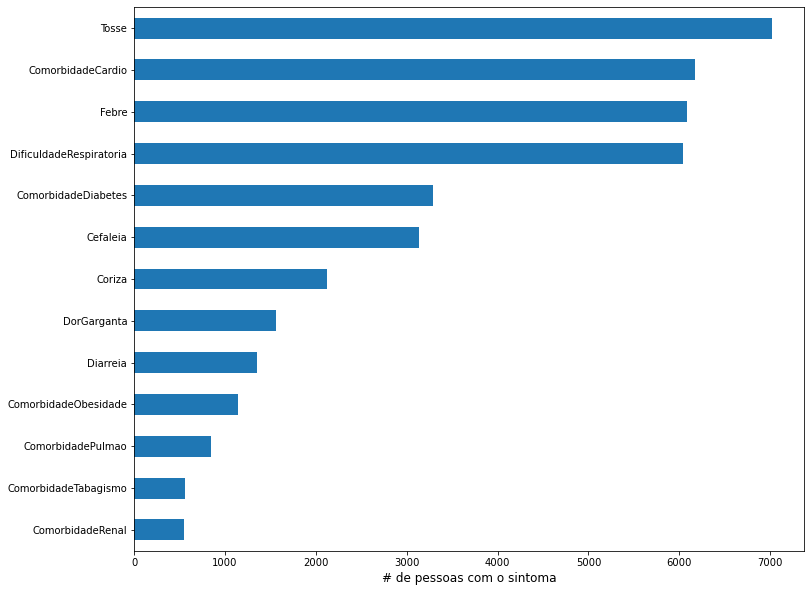

In [ ]:
#
pd.DataFrame({'Qntd': sintomas}).sort_values('Qntd').plot.barh(legend=False, figsize=(12,10))
plt.xlabel('# de pessoas com o sintoma', fontsize=12)

É possível notar que **Tosse, Comorbidade Cardiorespiratória, Febre, Dificuldade respiratoria** são os sintomas mais recorrentes em pessoas com covid.

In [ ]:
from datetime import datetime
#confirmados['mensal'] = pd.confirmados['DataObito'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
confirmados['DataObito'] = pd.to_datetime(confirmados['DataObito'])
confirmados.head()

,Classificacao,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,DataObito,Sintomas,Qntd_sintomas,Assintomatico
6103,Confirmados,Não,Não,Sim,Não,Não,Não,Sim,Não,Não,Não,Não,Não,Não,2021-07-05,"[Tosse, Cefaleia]",2,nao
6962,Confirmados,Não,Sim,Não,Não,Não,Não,Sim,Não,Sim,Não,Sim,Não,Não,2021-07-04,"[DificuldadeRespiratoria, Cefaleia, Comorbidad...",4,nao
8889,Confirmados,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2021-07-03,"[DificuldadeRespiratoria, Tosse]",2,nao
21751,Confirmados,Não,Sim,Não,Sim,Não,Não,Sim,Não,Sim,Não,Sim,Não,Não,2021-07-01,"[DificuldadeRespiratoria, Coriza, Cefaleia, Co...",5,nao
23172,Confirmados,Sim,Sim,Não,Não,Não,Não,Não,Sim,Não,Sim,Não,Não,Não,2021-07-01,"[Febre, DificuldadeRespiratoria, ComorbidadePu...",4,nao


Text(0.5, 1.0, 'Mortes clientes classificados como Confirmados')

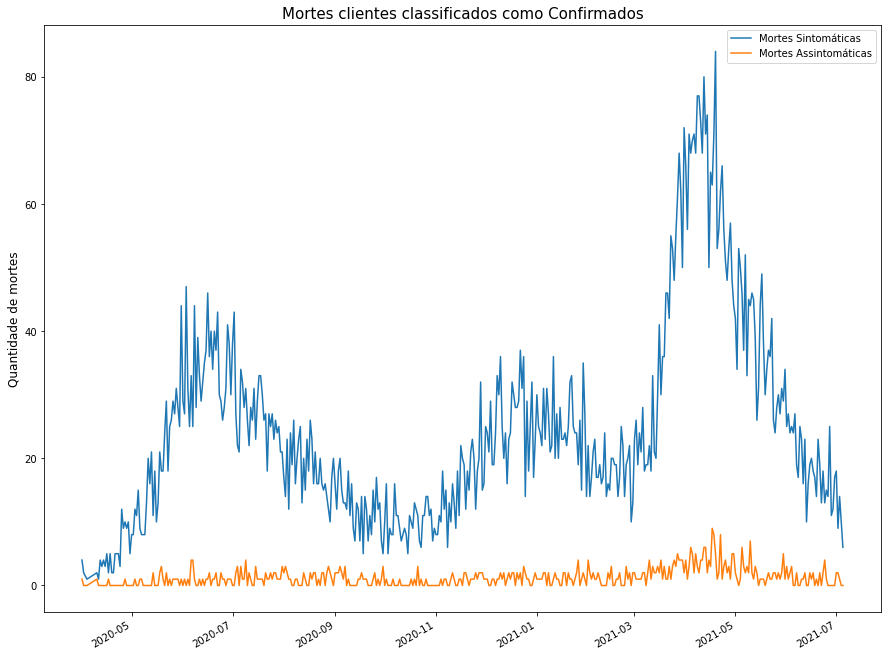

In [ ]:
# Mortes com e sem sintomas
#confirmados[confirmados['Assintomatico']=='sim'].groupby('DataObito').size().sort_index().plot(figsize=(15,12))
#confirmados[confirmados['Assintomatico']=='nao'].groupby('DataObito').size().sort_index().plot(figsize=(15,12))
confirmados.groupby(['DataObito', 'Assintomatico']).size().unstack().fillna(0).plot(figsize=(15,12))
plt.legend(['Mortes Sintomáticas', 'Mortes Assintomáticas'])
plt.xlabel('')
plt.ylabel('Quantidade de mortes', fontsize=12)
plt.title('Mortes clientes classificados como Confirmados', fontsize=15)

Em casos de mortes com Covid confirmado é possível notar que quase não houve mudança na quantidade de mortes. Entretanto, podemos ver que exitem **três** picos em pessoas sintomáticas.

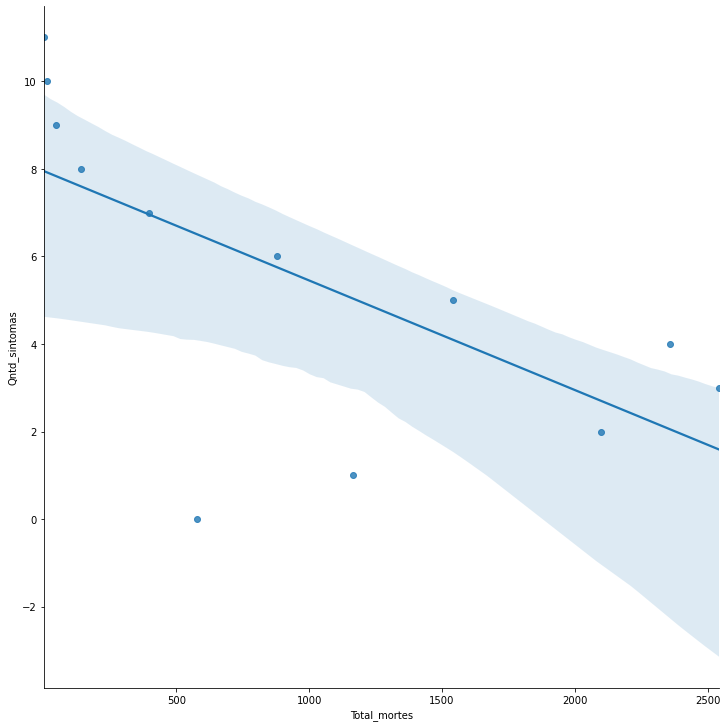

In [ ]:
sintomasXmortes = confirmados.groupby(['Qntd_sintomas']).size().to_frame('Total_mortes')
sintomasXmortes = sintomasXmortes.reset_index()
sns.lmplot(data=sintomasXmortes, y='Qntd_sintomas', x='Total_mortes', height=10)

In [ ]:
sintomasXmortes.corr()

,Qntd_sintomas,Total_mortes
Qntd_sintomas,1.000000,-0.658713
Total_mortes,-0.658713,1.000000


Podemos ver que temos uma correlação negativa mediana entre à **quantidade de sintomas** e a **quantidade de mortes**.

In [ ]:
descartados['Assintomatico'] = descartados.Sintomas.apply(lambda x:  'sim' if x==[] else 'nao')
descartados['DataObito'] = pd.to_datetime(descartados['DataObito'])

Text(0.5, 1.0, 'Mortes Descartados x Confirmados - Sintomáticos')

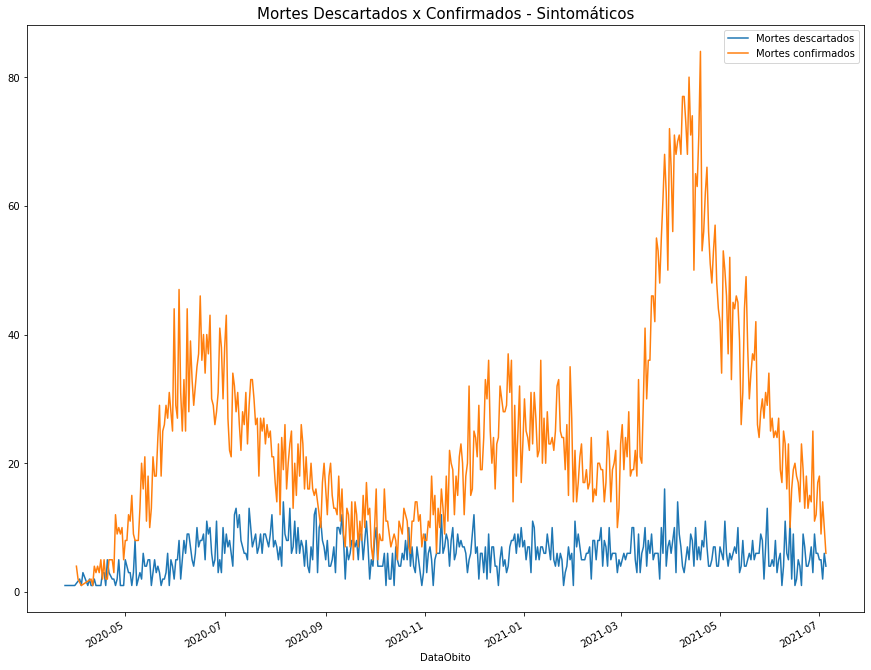

In [ ]:
descartados[descartados['Assintomatico']=='nao'].groupby('DataObito').size().sort_index().plot(figsize=(15,12))
confirmados[confirmados['Assintomatico']=='nao'].groupby('DataObito').size().sort_index().plot(figsize=(15,12))
plt.legend(['Mortes descartados', 'Mortes confirmados'])
plt.title('Mortes Descartados x Confirmados - Sintomáticos', fontsize=15)

Text(0.5, 1.0, 'Mortes Descartados x Confirmados - Sintomáticos')

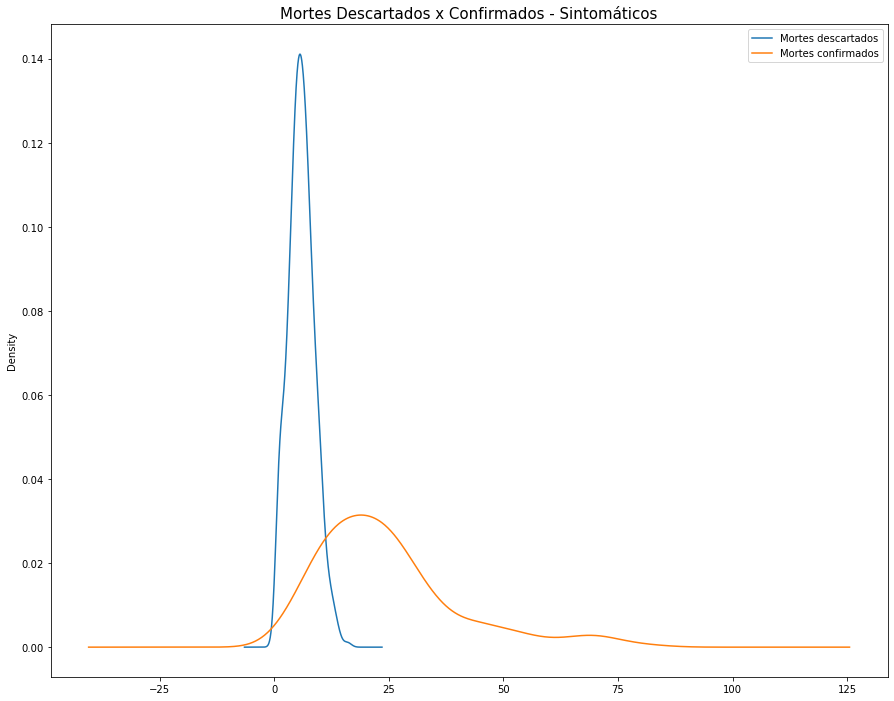

In [ ]:
descartados[descartados['Assintomatico']=='nao'].groupby('DataObito').size().sort_index().plot.kde(figsize=(15,12))
confirmados[confirmados['Assintomatico']=='nao'].groupby('DataObito').size().sort_index().plot.kde(figsize=(15,12))
plt.legend(['Mortes descartados', 'Mortes confirmados'])
plt.title('Mortes Descartados x Confirmados - Sintomáticos', fontsize=15)

Text(0.5, 1.0, 'Mortes Descartados x Confirmados - Assintomáticos')

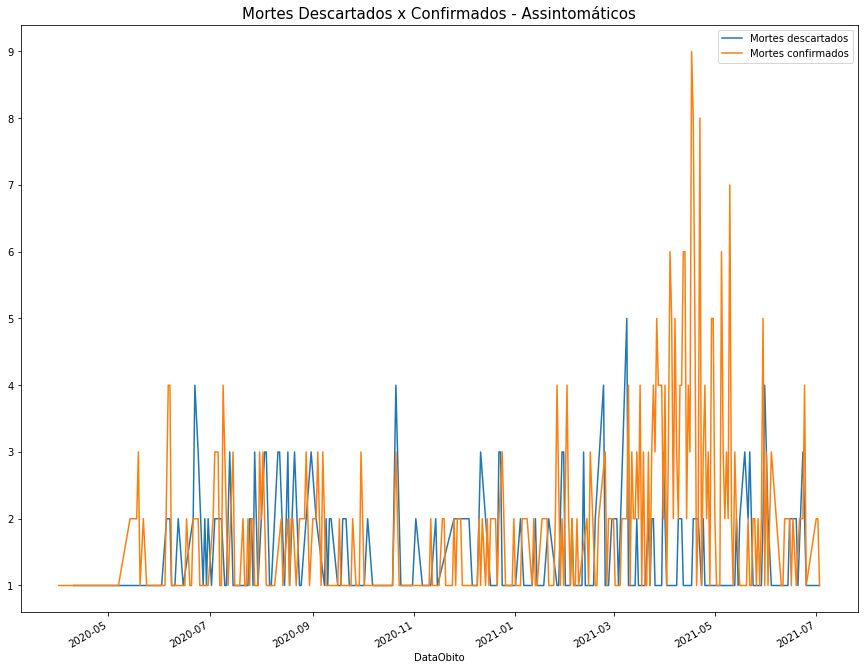

In [ ]:
descartados[descartados['Assintomatico']=='sim'].groupby('DataObito').size().sort_index().plot(figsize=(15,12))
confirmados[confirmados['Assintomatico']=='sim'].groupby('DataObito').size().sort_index().plot(figsize=(15,12))
plt.legend(['Mortes descartados', 'Mortes confirmados'])
plt.title('Mortes Descartados x Confirmados - Assintomáticos', fontsize=15)

Text(0.5, 1.0, 'Mortes Descartados x Confirmados - Assintomáticos')

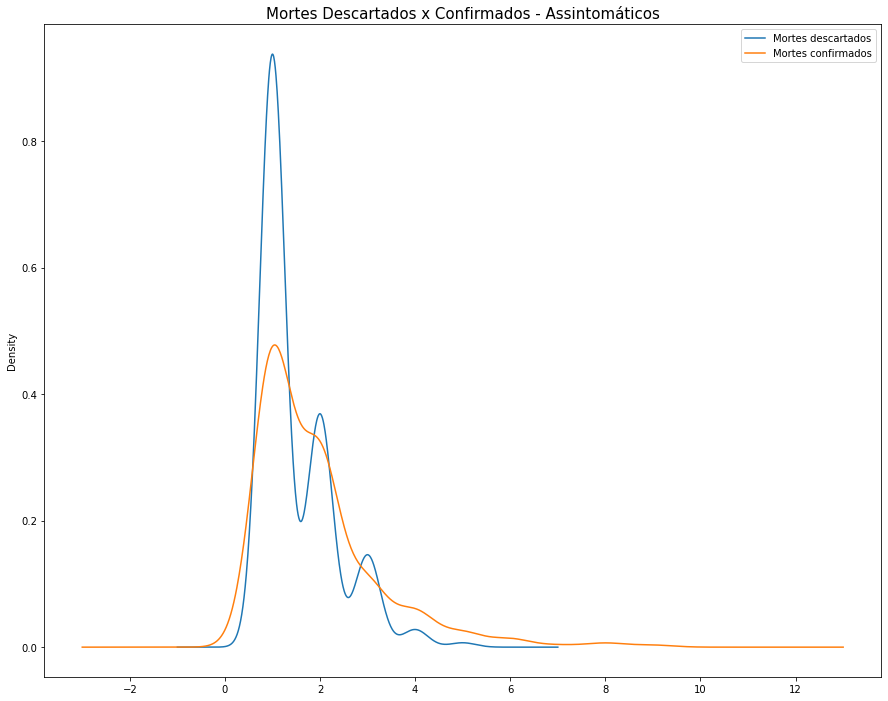

In [ ]:
descartados[descartados['Assintomatico']=='sim'].groupby('DataObito').size().sort_index().plot.kde(figsize=(15,12))
confirmados[confirmados['Assintomatico']=='sim'].groupby('DataObito').size().sort_index().plot.kde(figsize=(15,12))
plt.legend(['Mortes descartados', 'Mortes confirmados'])
plt.title('Mortes Descartados x Confirmados - Assintomáticos', fontsize=15)

### Visualizando Distribuições de Dados

Uma etapa inicial em qualquer esforço para analisar ou modelar dados deve ser entender como as variáveis são distribuídas.<br> As técnicas de visualização de distribuição podem fornecer respostas rápidas a muitas perguntas importantes.
- Que intervalo as observações cobrem? 
- Qual é a tendência central deles? 
- Eles estão fortemente inclinados em uma direção? 
- Existem evidências de bimodalidade? 
- Existem outliers significativos? 
- As respostas a essas perguntas variam entre os subconjuntos definidos por outras variáveis?

In [ ]:
import seaborn as sns # Visualização Estatística de Dados
import matplotlib.pyplot as plt # Visualização Interativa
%matplotlib inline

O gráfico de dispersão é um dos pilares da visualização estatística. Ele descreve a distribuição conjunta de duas variáveis usando uma nuvem de pontos, onde cada ponto representa uma observação no conjunto de dados. Essa representação permite que o olho deduza uma quantidade substancial de informações sobre se existe alguma relação significativa entre eles.

<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

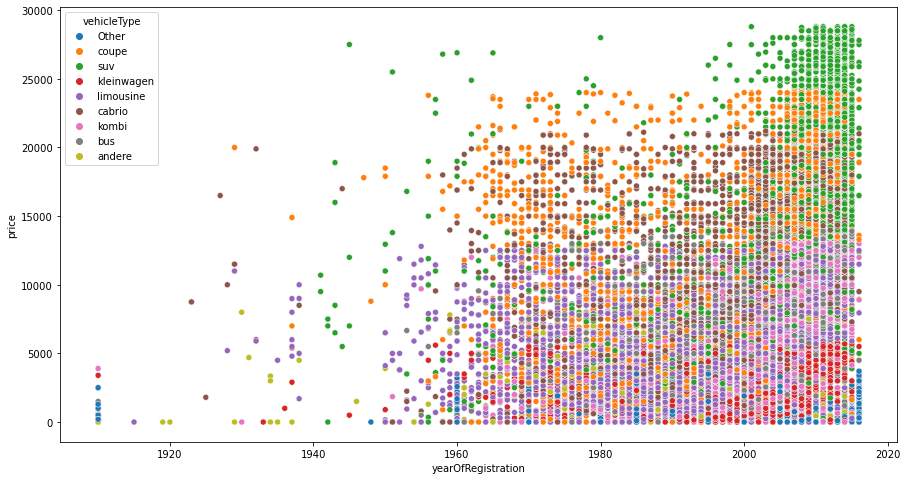

In [ ]:
# Gráfico de Dispersão
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=df, x='yearOfRegistration', y='price', hue="vehicleType", ax=ax)

In [ ]:
# Correlação
df.corr(method = 'pearson')

,price,yearOfRegistration,powerPS,kilometer,postalCode,yearOfCreation,yearCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld,monthOfCreation_num
price,1.000000,0.376027,0.163499,-0.268458,0.070188,-0.006221,NaN,0.133884,-0.018861,-0.376027,-0.097924,0.014080
yearOfRegistration,0.376027,1.000000,0.048782,-0.114523,0.028707,-0.000559,NaN,0.002932,0.002358,-1.000000,-0.067759,0.000960
powerPS,0.163499,0.048782,1.000000,0.022740,0.021155,-0.000509,NaN,0.020227,-0.002630,-0.048782,-0.037124,0.002705
kilometer,-0.268458,-0.114523,0.022740,1.000000,0.004220,0.004046,NaN,-0.049819,0.009323,0.114523,-0.020406,-0.001631
postalCode,0.070188,0.028707,0.021155,0.004220,1.000000,0.001371,NaN,0.027324,0.003309,-0.028707,-0.010752,0.010286
yearOfCreation,-0.006221,-0.000559,-0.000509,0.004046,0.001371,1.000000,NaN,-0.148169,-0.002086,0.000559,-0.002185,-0.158738
yearCrawled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NoOfDaysOnline,0.133884,0.002932,0.020227,-0.049819,0.027324,-0.148169,NaN,1.000000,-0.141280,-0.002932,0.002303,-0.304347
NoOfHrsOnline,-0.018861,0.002358,-0.002630,0.009323,0.003309,-0.002086,NaN,-0.141280,1.000000,-0.002358,-0.005850,0.102240
yearsOld,-0.376027,-1.000000,-0.048782,0.114523,-0.028707,0.000559,NaN,-0.002932,-0.002358,1.000000,0.067759,-0.000960


In [ ]:
# Assimetria
df.skew()

price                    1.941238
yearOfRegistration      -1.956417
powerPS                 61.679011
kilometer               -1.993883
postalCode               0.082331
yearOfCreation        -119.396970
yearCrawled              0.000000
NoOfDaysOnline           1.791657
NoOfHrsOnline           -0.084693
yearsOld                 1.956417
monthsOld               -0.106685
monthOfCreation_num      2.269999
dtype: float64

In [ ]:
# Achatamento
df.kurtosis()

price                      4.624450
yearOfRegistration        16.477746
powerPS                 4806.698766
kilometer                  3.183443
postalCode                -0.960302
yearOfCreation         14253.727285
yearCrawled                0.000000
NoOfDaysOnline            23.474370
NoOfHrsOnline             -1.029770
yearsOld                  16.477746
monthsOld                 -1.310060
monthOfCreation_num       14.364032
dtype: float64

In [ ]:
# dados.Age.value_counts() # Distribuição de Frequências
# df.Age.value_counts(bins = 5) # Definindo nº de Classes

## Statistical Data Visualization

In [ ]:
import matplotlib.pyplot as plt # Visualização Interativa
%matplotlib inline

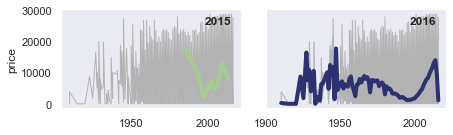

In [ ]:
sns.set_theme(style="dark")
                     
# Plot each year's time series in its own facet
g = sns.relplot(
    data=df,
    x="yearOfRegistration", y="price", col="yearOfCreation", hue="yearOfCreation",
    kind="line", palette="crest", linewidth=4, zorder=12,
    col_wrap=5, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for yearOfCreation, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, yearOfCreation, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=df, x="yearOfRegistration", y="price", units="yearOfCreation",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "price")
g.tight_layout()

<AxesSubplot:xlabel='monthOfCreation', ylabel='price'>

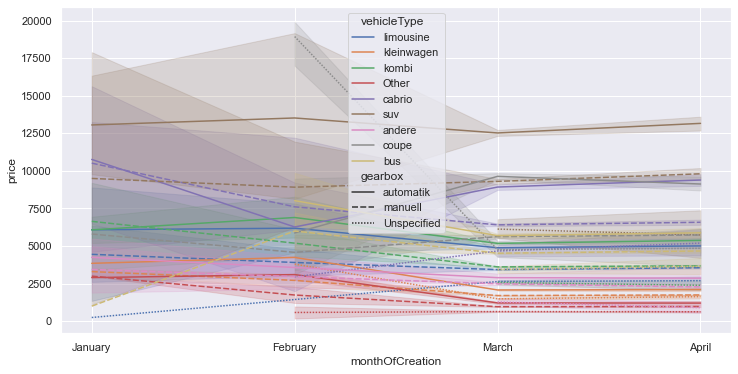

In [ ]:
# import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
dataset = df[df.yearOfCreation == 2016].sort_values(["yearOfCreation", "monthOfCreation_num"])

# Plot the responses for different events and regions
sns.lineplot(x="monthOfCreation", y="price",
             hue="vehicleType", style="gearbox",
             data=dataset)

In [ ]:
# Density Plot Univariado
plot(kind = 'density',
        subplots = True,
        # layout = (3, 3),
        sharex = False)
plt.show()

NameError: name 'plot' is not defined

<AxesSubplot:xlabel='monthOfCreation', ylabel='price'>

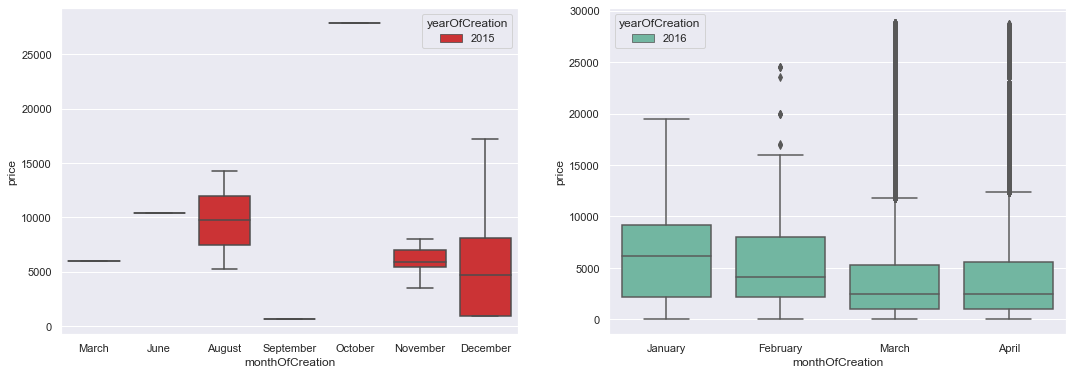

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize=(18, 6), ncols = 2)

dataset = df[df.yearOfCreation == 2015].sort_values('monthOfCreation_num')

# Box e Whisker Plots
sns.boxplot(
    x = 'monthOfCreation', 
    y = 'price', 
    hue = 'yearOfCreation',
    palette = 'Set1',
    ax = ax1,
    data = dataset)

dataset = df[df.yearOfCreation == 2016].sort_values('monthOfCreation_num')

# Box e Whisker Plots
sns.boxplot(
    x = 'monthOfCreation', 
    y = 'price', 
    hue = 'yearOfCreation',
    palette = 'Set2',
    ax = ax2,
    data = dataset)


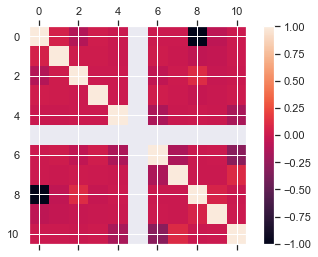

In [ ]:
# Matriz de Correlação Genérica
correlacoes = df[feature_names].corr()

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlacoes,
                 vmin = -1,
                 vmax = 1)
fig.colorbar(cax)
plt.show()

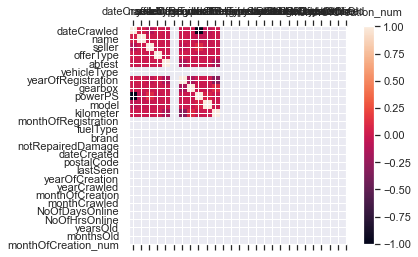

In [ ]:
import numpy as np

# Matriz de Correlação com Nomes das Variáveis
correlacoes = df[feature_names].corr()

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlacoes,
                 vmin = -1,
                 vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, len(feature_names), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(feature_names)
ax.set_yticklabels(feature_names)
plt.show()

C:\Users\ulp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:89: UserWarning: Attempting to set identical left == right == 2016.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\ulp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:90: UserWarning: Attempting to set identical bottom == top == 2016.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\ulp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 2016.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


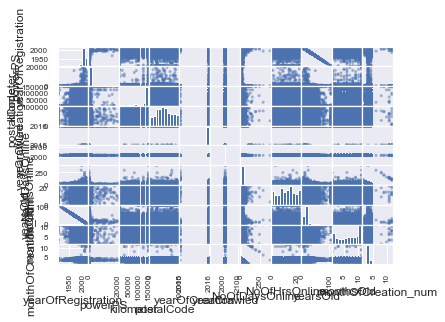

In [ ]:
# Scatter Plot
pd.plotting.scatter_matrix(df[feature_names])
plt.show()

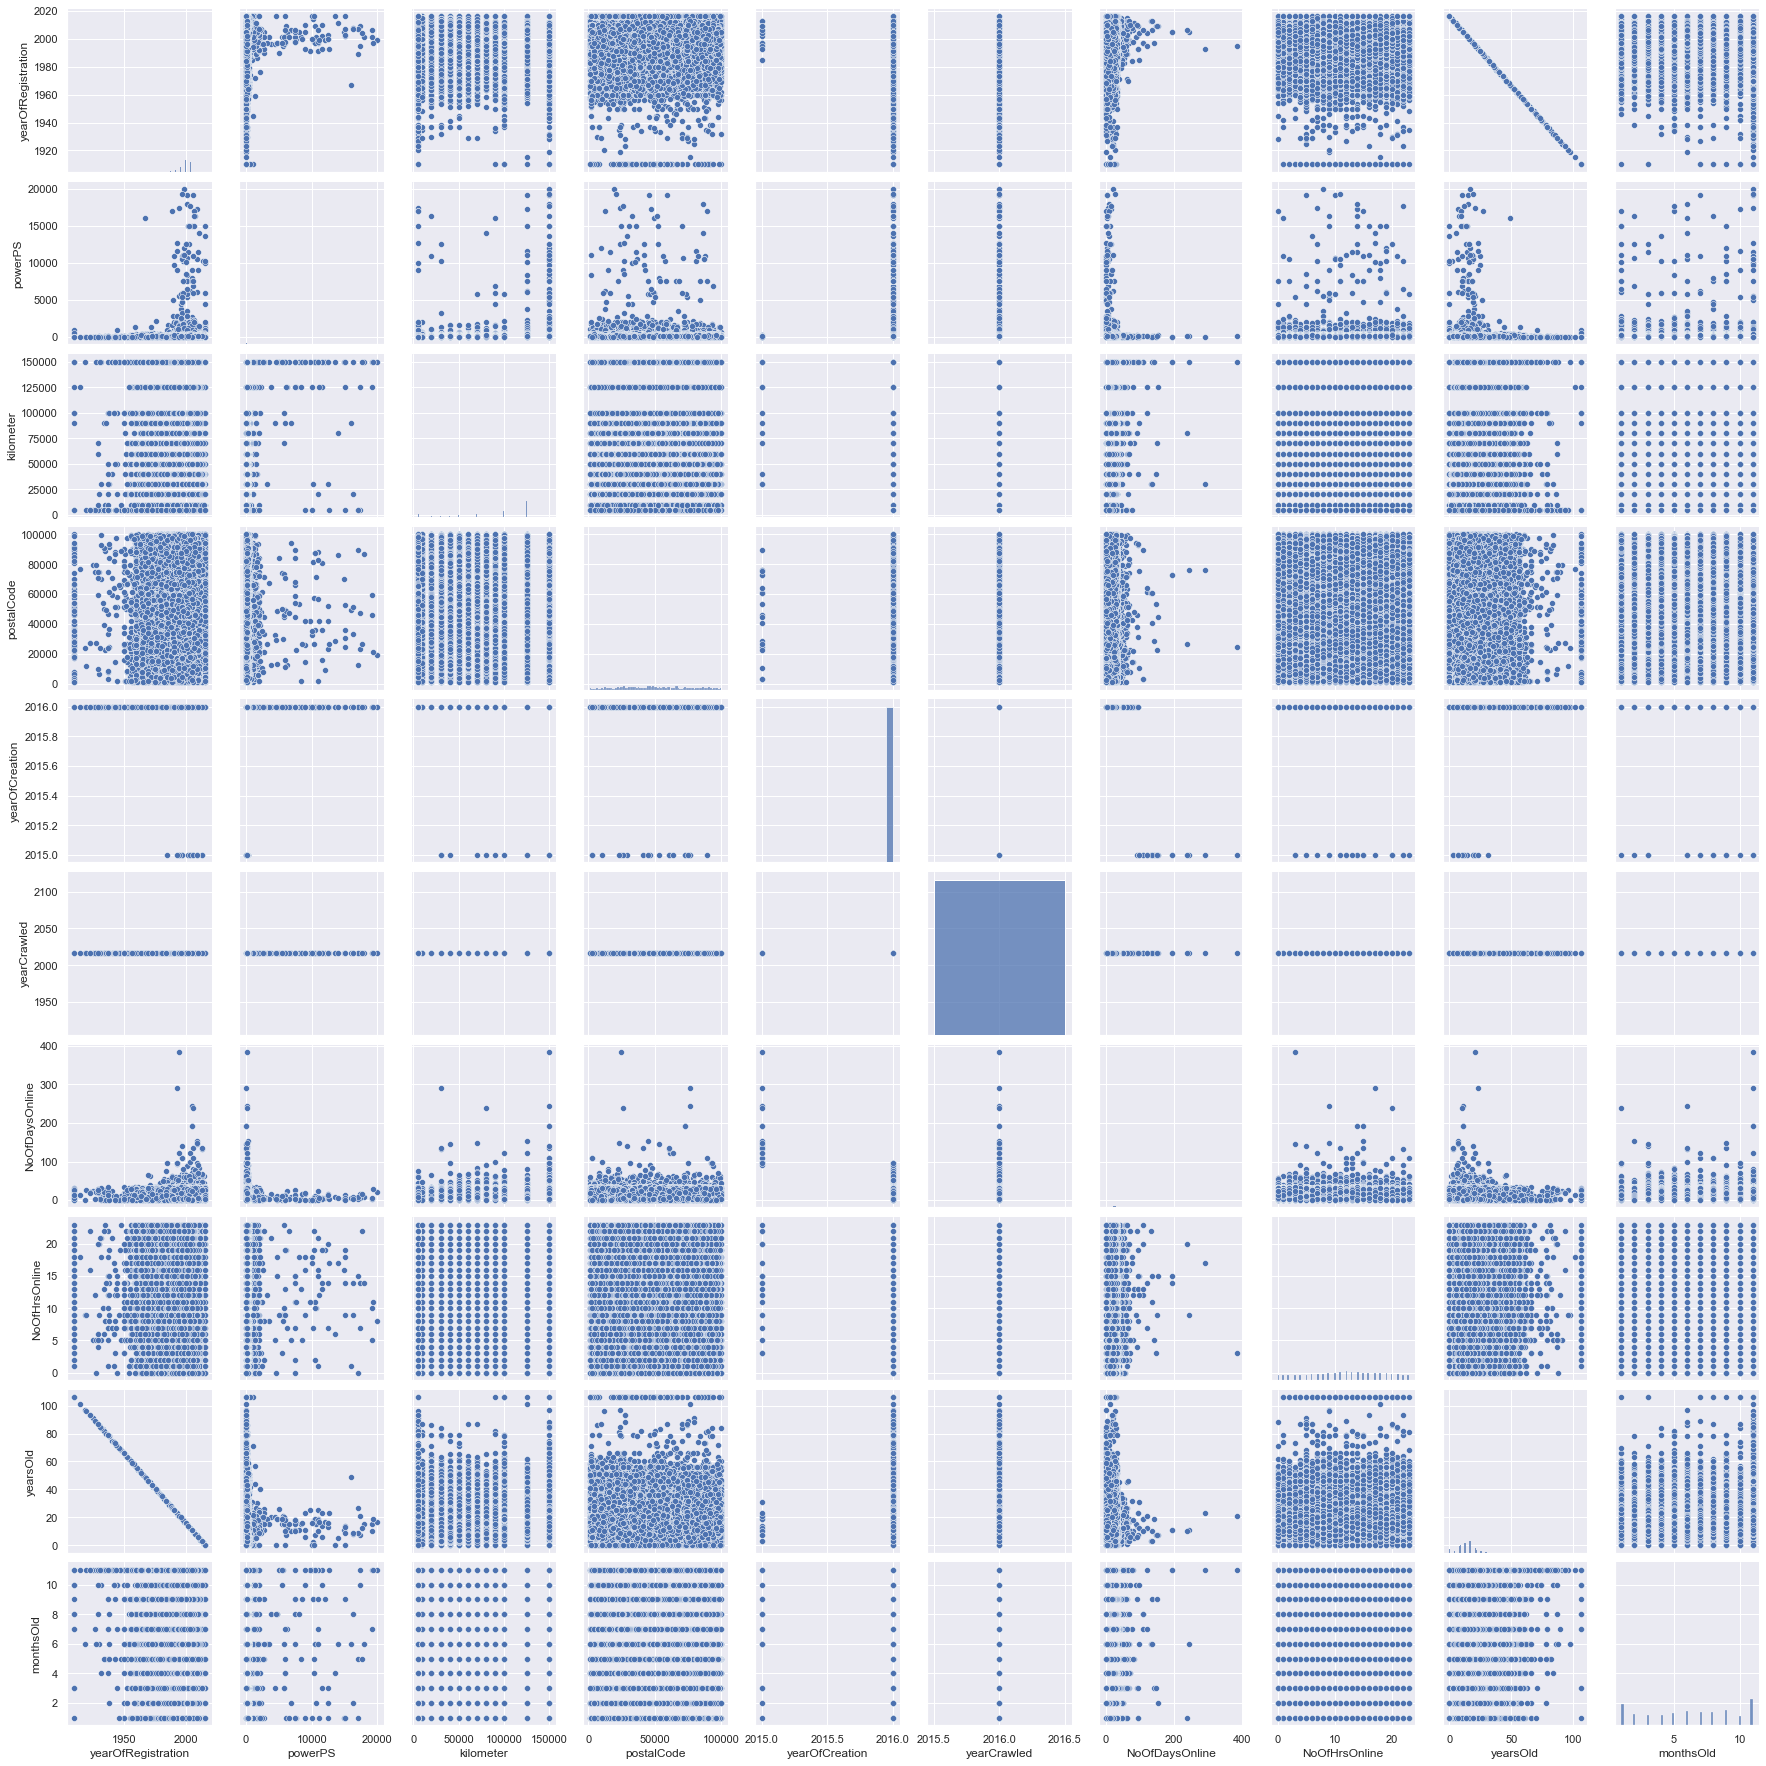

In [ ]:
# Pairplot
sns.pairplot(df[feature_names])

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))
# Boxplot com orientação vertical
sns.boxplot(data = data[feature_names],
            orient = "v")

In [ ]:
from scipy import stats

In [ ]:
# Clustermap
sns.clustermap(df[feature_names].dropna())

In [ ]:
# Distribuição Normal
sns.displot(df, fit = stats.norm)

## Interpret Results

### ...